# Documentation for linear regression algorithm

## Predict program

First import the needed modules
sys is needed for exiting the program
theta is the prepared file from the training program. In Case it did not run yet, we initialize theta0 and theta1 to 0

In [1]:
import sys
try:
	import theta
	theta1 = theta.theta1
	theta0 = theta.theta0
except:
	theta1 = 0
	theta0 = 0

In [2]:
mileage = input("please enter your mileage:")

please enter your mileage: 25000


After we got the mileage to predict the price we calculate the prediction based on the thetas and the input.
If the input is wrong, we catch an exception.
If the prediction would result in a negative price we reset to 0 and print the prediction

In [3]:
try:
	prediction = theta1 * int(mileage) + theta0
	if prediction < 0:
		prediction = 0
	print("the predicted price to sell a car with", mileage, "km mileage is:", round(prediction,0))
except:
	print("wrong input")
	sys.exit(1)

the predicted price to sell a car with 25000 km mileage is: 7976.0


## Train program (incl. bonus 1 and 2)

Import needed modules. Throw errors if not all modules are installed or the data file is not present or readable.
Also handler for Ctrl + C KeyboardInterrupt handling.

In [4]:
import sys
try:
	import pandas as pd
	import matplotlib.pyplot as plt
except:
	print("you need to pip install matplotlib pandas first")
	sys.exit(1)
import signal, sys
def sigint_handler(signal, frame):
    print ('Ctrl+C not allowed')

signal.signal(signal.SIGINT, sigint_handler)

try:
	data = pd.read_csv('data.csv')
except FileNotFoundError:
	print("file not found")
	sys.exit(1)

Loaded Data needs to be normalized or we could run into an overflow.

In [5]:
max_km = data["km"].max()
max_price = data["price"].max()

data["km"] /= max_km
data["price"] /= max_price

For the prediction of the value we use the function theta1 * x + theta0. That function will create a straight line that can predict to a certain degree what values we get for a certain input.
To optimize that line we use the gradient descent algorithm of the following function.

In [6]:
def gradient_descent(theta1, theta0, points, L):
	theta1_gradient = 0
	theta0_gradient = 0

	n = len(points)

	for i in range(n):
		x = points.iloc[i].km
		y = points.iloc[i].price
		theta1_gradient = (((theta1 * x + theta0) - y) * x)
		theta0_gradient = ((theta1 * x + theta0) - y)
		theta1 -= L * (1/n) * theta1_gradient
		theta0 -= L * (1/n) * theta0_gradient

	return theta1, theta0

this part calls the gradient descent function multiple times to minimize the deviation between the data points and the prediction.

In [7]:
theta1 = 0
theta0 = 0
theta0_prev = None
L = 0.1
epochs = 10000
try:
	approx = int(sys.argv[1])
	print("custom approximation set to:", approx)
except:
	print("no custom approximation, setting to standard 8")
	approx = 8

for i in range(epochs):
	theta1, theta0 = gradient_descent(theta1, theta0, data, L)
	if (i % 1000) == 0:
		print(i, "/", epochs, "- thetas", theta1, theta0)
	if theta0_prev != round(theta0, approx):
		theta0_prev = round(theta0, approx)
	else:
		print("stopped at iteration", i, "- reached approximation to", approx,"th decimal place")
		break

no custom approximation, setting to standard 8
0 / 10000 - thetas 0.028168193642417946 0.07277206814407498
1000 / 10000 - thetas -0.6035880315245832 1.019078000929339
2000 / 10000 - thetas -0.6213152684634656 1.026732432777935
3000 / 10000 - thetas -0.6216711182952879 1.0268860849401653
stopped at iteration 3075 - reached approximation to 8 th decimal place


to get the right values we need to de-normalize the data again and export the thetas to a file so the predict program can use them to predict the prices

In [8]:
data["km"] *= max_km
data["price"] *= max_price
theta1 *= max_price / max_km
theta0 *= max_price

file = open('theta.py', 'w')
filcontent = "theta0 = " + str(theta0) + "\r\n" + "theta1 = " + str(theta1) + "\r\n"
file.write(filcontent)
file.close()

Here you can see the plottet data points (bonus 1)

Text(0, 0.5, 'price')

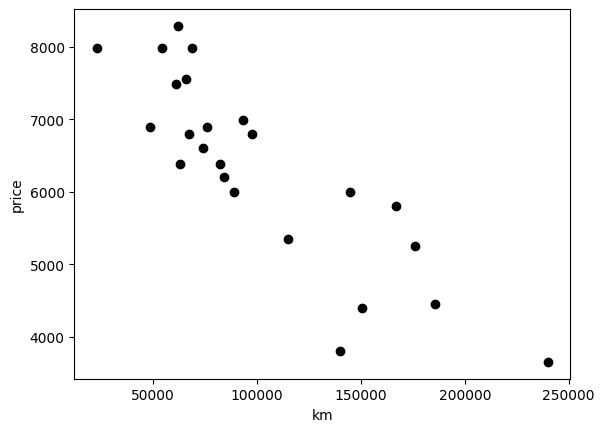

In [9]:
plt.scatter(x=data["km"], y=data["price"], color="black")
plt.xlabel("km")
plt.ylabel("price")
plt.show()

...and the data points incl the linear regression line (bonus 2)

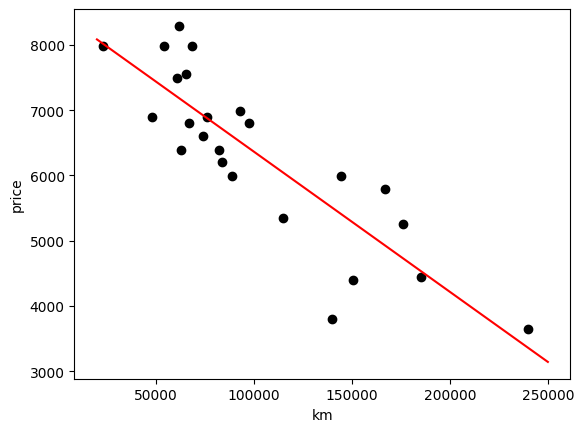

In [10]:
plt.scatter(x=data["km"], y=data["price"], color="black")
plt.xlabel("km")
plt.ylabel("price")
plt.plot(list(range(20000, 250000)), [theta1 * x + theta0 for x in range(20000, 250000)], color="red")
plt.show()

## Precision program (bonus 3)

import necessary modules incl. error handling

In [15]:
import sys
import math
try:
	import pandas as pd
	import matplotlib.pyplot as plt
	import numpy as np
except:
	print("you need to pip install matplotlib pandas numpy first")
	sys.exit(1)

try:
	import theta
	theta1 = theta.theta1
	theta0 = theta.theta0
	data = pd.read_csv('data.csv')
	data_norm = pd.read_csv('data.csv')
except:
	print("input files not found - check if data.csv is present and run train.py first")
	sys.exit(1)

calculate the average of all price data points

In [16]:
mean = np.mean(data["price"])
plot_data = [mean] * len(data["km"])

calculate Mean Squared Error (MSE) for the average of all the price data points and
calculate MSE for the trained model

In [17]:
def calc_mse(data, mean):
	mse = np.sum((data["price"] - mean) ** 2)
	return mse

def calc_mse_lin_reg(data, theta0, theta1):
	predictions = theta1 * data["km"] + theta0
	squared_diff = (data["price"] - predictions) ** 2
	mse = np.sum(squared_diff)
	return mse

mse = calc_mse(data, mean)
mse_lin_reg = calc_mse_lin_reg(data, theta0, theta1)
# print(mse_lin_reg)
# print(mse)

gradient descent function from the training module

In [18]:
def gradient_descent(theta1, theta0, points, L):
	theta1_gradient = 0
	theta0_gradient = 0

	n = len(points)

	for i in range(n):
		x = points.iloc[i].km
		y = points.iloc[i].price
		theta1_gradient = (((theta1 * x + theta0) - y) * x)
		theta0_gradient = ((theta1 * x + theta0) - y)
		theta1 -= L * (1/n) * theta1_gradient
		theta0 -= L * (1/n) * theta0_gradient

	return theta1, theta0

data preparation for gradient descent graph and saving every iteration to an array for plotting the graph

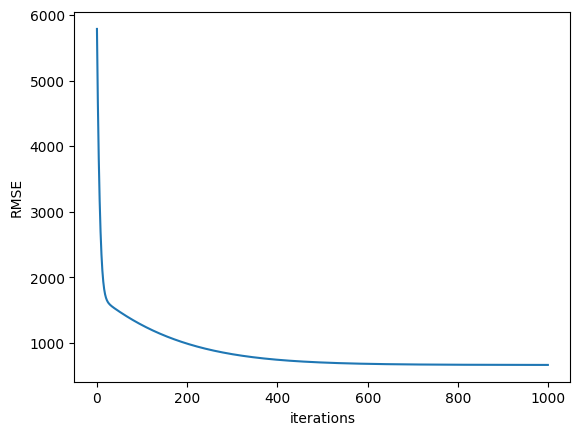

In [19]:
max_km = data_norm["km"].max()
max_price = data_norm["price"].max()

data_norm["km"] /= max_km
data_norm["price"] /= max_price

rmse_precision = []
theta1_rmse = 0
theta0_rmse = 0

for i in range(1000):
	theta1_rmse, theta0_rmse = gradient_descent(theta1_rmse, theta0_rmse, data_norm, 0.1)
	# print(theta1_rmse, theta0_rmse)
	# print(math.sqrt(calc_mse_lin_reg(data, theta0_rmse, theta1_rmse)))
	rmse_precision.append(math.sqrt(calc_mse_lin_reg(data, theta0_rmse * max_price, theta1_rmse * max_price / max_km)))

plt.clf()
plt.xlabel("iterations")
plt.ylabel("RMSE")
plt.plot(np.array(rmse_precision))
plt.show()

calculate r_squared and Root Mean Squared Error (RMSE) and print them

In [20]:
r2 = 1 - mse_lin_reg / mse
print("R-squared: The km/price relationship accounts for", round(r2*100,2), "% of the variation")
print("The Root Mean Squared Error is", round(math.sqrt(mse_lin_reg / len(data["km"])),0), "meaning that the prediction is in the range of +-", round(math.sqrt(mse_lin_reg / len(data["km"])),0), "of the price")

The km/price relationship accounts for r^2 73.29 % of the variation
The Root Mean Squared Error is 668.0 meaning that the prediction is in the range of +- 668.0 of the price


plot all calculated above into a graph

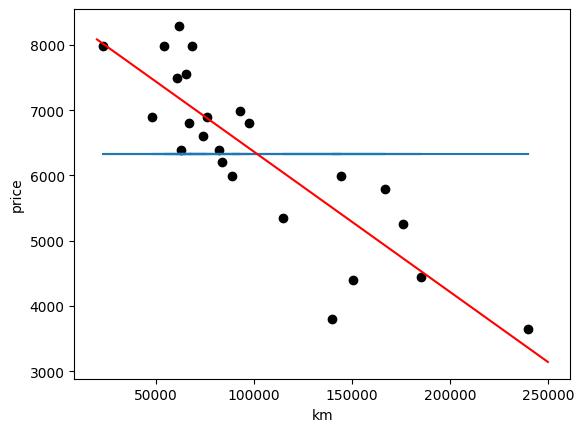

In [21]:
plt.scatter(x=data["km"], y=data["price"], color="black")
plt.xlabel("km")
plt.ylabel("price")
plt.plot(data["km"], plot_data)
plt.plot(list(range(20000, 250000)), [theta1 * x + theta0 for x in range(20000, 250000)], color="red")
plt.show()